In [86]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

## 데이터 불러오기

In [128]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [129]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.000,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.000,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.000,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.000,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.000,1


In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [131]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [132]:
train.drop('id', axis =1, inplace = True)
test.drop('id', axis =1, inplace=True)

In [133]:
non_obj_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

In [134]:
non_obj_col

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'target']

In [135]:
object_col

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [136]:
numeric_col = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

In [137]:
rank_col = [i for i in non_obj_col if i not in numeric_col]

In [97]:
rank_col

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'target']

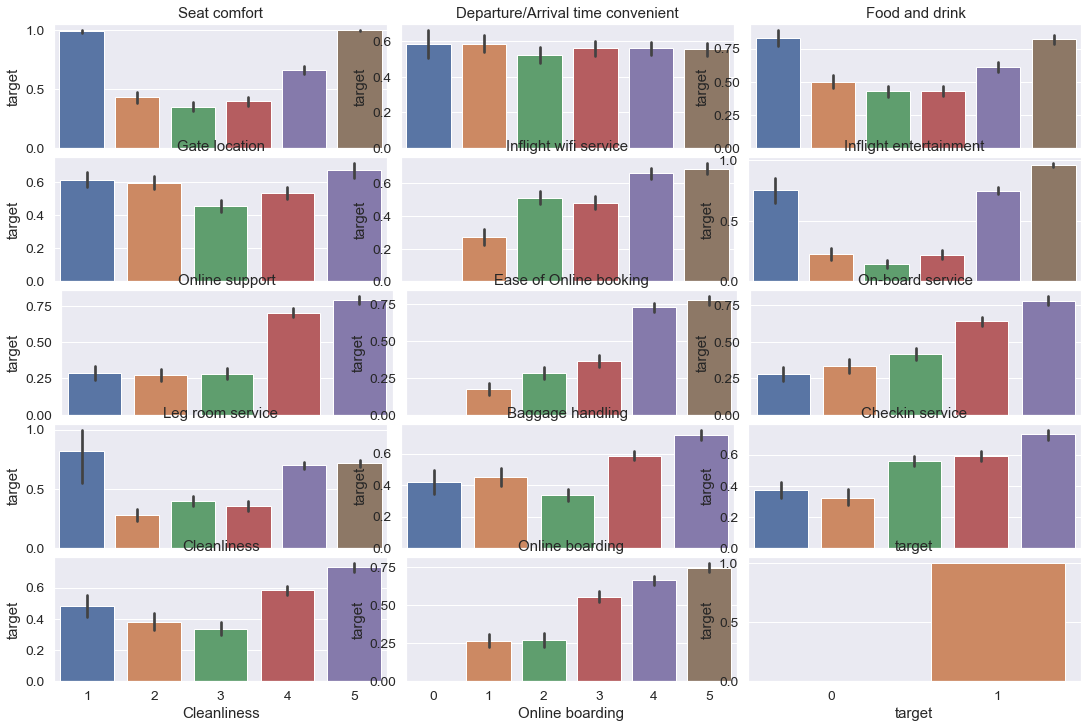

In [98]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(rank_col)):
    plt.subplot( 5, 3, i+1 )
    sns.barplot(x = rank_col[i], y = 'target', data = train)
    plt.title(rank_col[i])

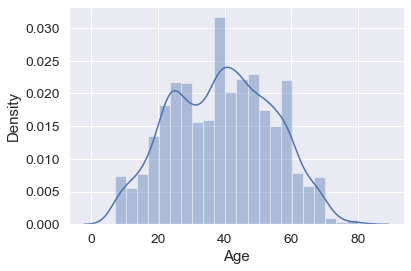

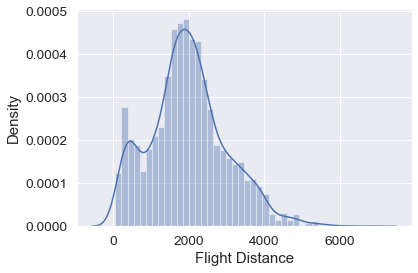

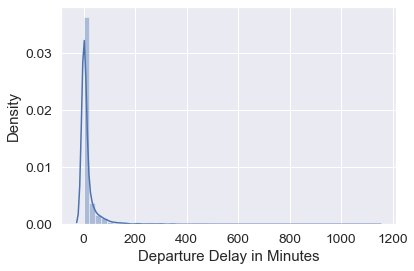

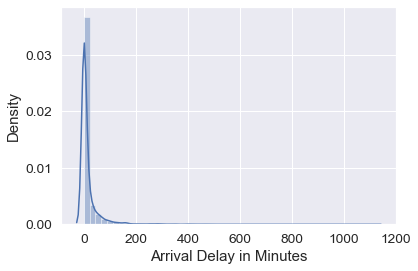

In [99]:
for i in numeric_col:
    sns.distplot(train[i])
    plt.show()

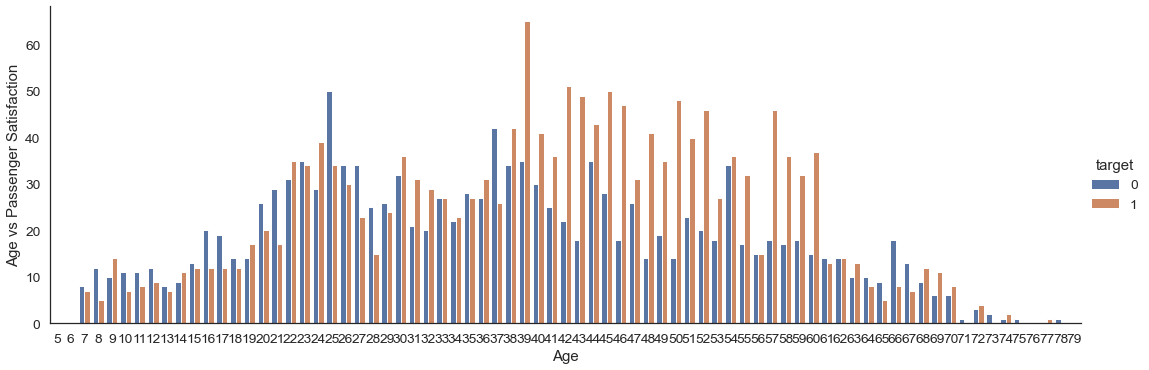

In [100]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='target', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

연령대에 따른 특징이 보여 원핫인코딩으로 진행

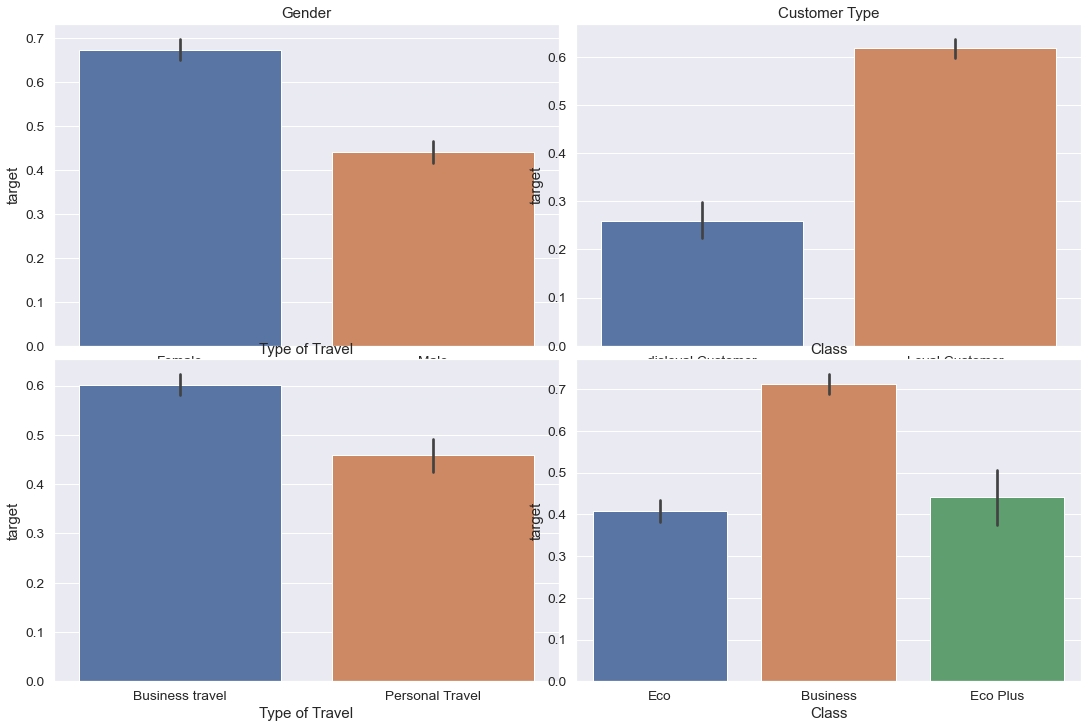

In [101]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(object_col)):
    plt.subplot( 2, 2, i+1 )
    sns.barplot(x = object_col[i], y = 'target', data = train)
    plt.title(object_col[i])

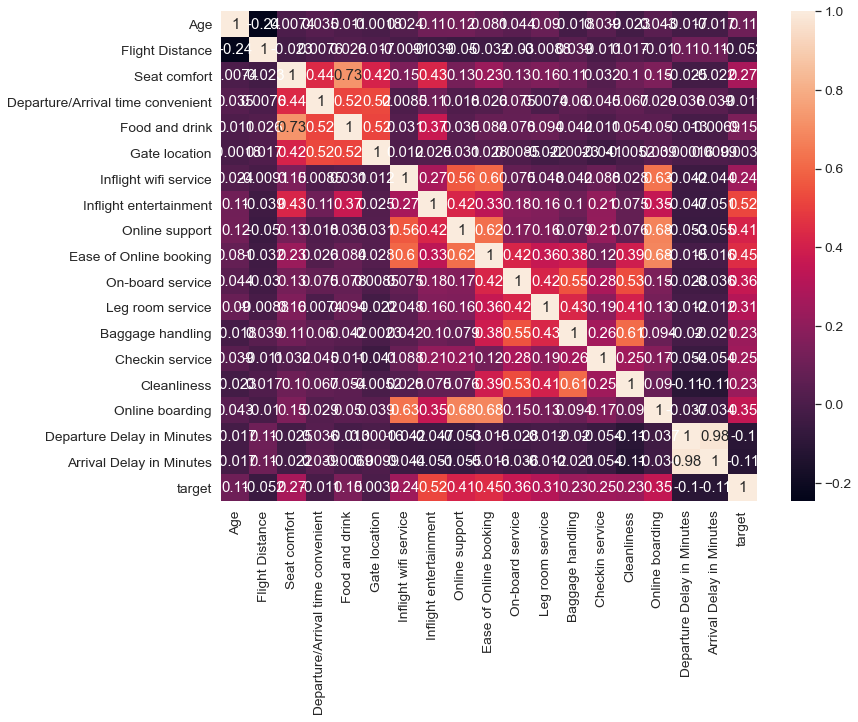

In [138]:
cor = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor, annot = True)
plt.show()

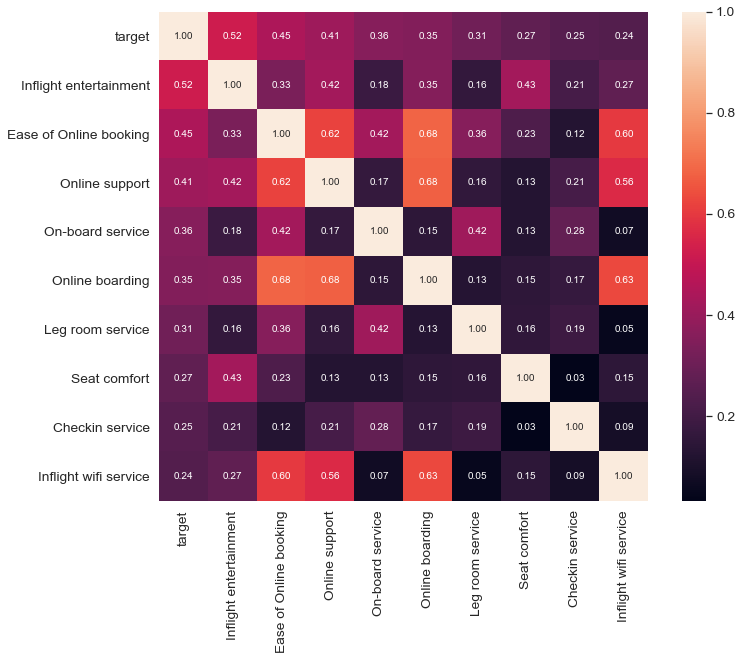

In [103]:
k = 10 #number of variables for heatmap
cols = cor.nlargest(k, 'target')['target'].index
cm = np.corrcoef(train[cols].values.T)
plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [139]:
cor['target'].sort_values()

Arrival Delay in Minutes            -0.112
Departure Delay in Minutes          -0.105
Flight Distance                     -0.052
Departure/Arrival time convenient   -0.011
Gate location                        0.003
Age                                  0.107
Food and drink                       0.145
Baggage handling                     0.232
Cleanliness                          0.235
Inflight wifi service                0.242
Checkin service                      0.249
Seat comfort                         0.271
Leg room service                     0.311
Online boarding                      0.351
On-board service                     0.360
Online support                       0.412
Ease of Online booking               0.448
Inflight entertainment               0.523
target                               1.000
Name: target, dtype: float64

Age를 제외한 하위 5개의 변수는 제거해준다.

In [140]:
drop_index = cor['target'].sort_values().index[:5]

In [141]:
train.drop(drop_index, axis = 1, inplace= True)
test.drop(drop_index, axis = 1, inplace= True)

In [142]:
non_obj_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

In [143]:
non_obj_col

['Age',
 'Seat comfort',
 'Food and drink',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'target']

In [144]:
numeric_col = ['Age']
target_col = ['target']
rank_col = [i for i in non_obj_col if i not in numeric_col and i not in target_col]

In [145]:
print(rank_col)
print(object_col)
print(numeric_col)
print(target_col)

['Seat comfort', 'Food and drink', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
['Gender', 'Customer Type', 'Type of Travel', 'Class']
['Age']
['target']


Feature Engineering

In [146]:
from sklearn.preprocessing import LabelEncoder
for i in object_col:
    lab = LabelEncoder()
    lab.fit(train[i])
    train[i] = lab.transform(train[i])
    test[i] = lab.transform(test[i])


In [147]:
train['Age'] = train['Age'] // 10
train['Age'] = train['Age'].astype('str')
test['Age'] = test['Age'] // 10
test['Age'] = test['Age'].astype('str')

In [113]:
zero_sc_train = []
for i in rank_col:
    if len(train[train[i] == 0]) > 0:
        zero_sc_train.append(i)
        print(i,len(train[train[i] == 0])) 

Seat comfort 106
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1


In [114]:
zero_sc_test = []
for i in rank_col:
    if len(test[test[i] == 0]) > 0:
        zero_sc_test.append(i)
        print(i,len(test[test[i] == 0])) 

Seat comfort 64
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


In [63]:
for i in zero_sc_train:
    train[i+'_zero'] = 0
    test[i+'_zero'] = 0

In [64]:
for i in zero_sc_train:
    for j in range(len(train)):
        if train[i][j] == 0:
            train[i+'_zero'] = 1

In [65]:
for i in zero_sc_test:
    for j in range(len(test)):
        if test[i][j] == 0:
            test[i+'_zero'] = 1

### Zero가 있는 열 onehot encoding후 0 제거

In [115]:
for i in zero_sc_train:
    train[i] = train[i].astype('str')
    test[i] = test[i].astype('str')

In [117]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [122]:
for i in zero_sc_train:
    try:
        train.drop(i+'_0', axis = 1, inplace = True)
        test.drop(i+'_0', axis = 1, inplace = True)
    except:
        continue

In [148]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [149]:
y = train['target']
train.drop('target', axis = 1, inplace =True)

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold
# import xgboost as xgb
# import lightgbm as lgb
import catboost as cat

In [150]:
model_cat = cat.CatBoostClassifier()

In [151]:
model_cat.fit(train, y)

Learning rate set to 0.016469
0:	learn: 0.6776519	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6615609	total: 5.39ms	remaining: 2.69s
2:	learn: 0.6459107	total: 8.63ms	remaining: 2.87s
3:	learn: 0.6303246	total: 10.7ms	remaining: 2.66s
4:	learn: 0.6195421	total: 12.6ms	remaining: 2.51s
5:	learn: 0.6066772	total: 14.2ms	remaining: 2.35s
6:	learn: 0.5948495	total: 16.3ms	remaining: 2.31s
7:	learn: 0.5842130	total: 19.1ms	remaining: 2.37s
8:	learn: 0.5710018	total: 22ms	remaining: 2.42s
9:	learn: 0.5600879	total: 25.1ms	remaining: 2.48s
10:	learn: 0.5484798	total: 28.9ms	remaining: 2.6s
11:	learn: 0.5387902	total: 31.6ms	remaining: 2.6s
12:	learn: 0.5292675	total: 34.2ms	remaining: 2.6s
13:	learn: 0.5193559	total: 36.8ms	remaining: 2.59s
14:	learn: 0.5091113	total: 39ms	remaining: 2.56s
15:	learn: 0.5004319	total: 40.7ms	remaining: 2.5s
16:	learn: 0.4918995	total: 42.7ms	remaining: 2.47s
17:	learn: 0.4845612	total: 45.3ms	remaining: 2.47s
18:	learn: 0.4785275	total: 49.7ms	remaining: 2.57s


In [152]:
cat_test_pred = model_cat.predict(test)

In [153]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred
sub.to_csv('cat_submission.csv', index=False)